# Exploratory work

## Ideas

- do movies cheat representation ? (character cross-dressing, faking ethnicity, etc.)
- some cool kind of movie graph where some actors are more correlated with certain genres
- given an actor profile, can we predict the kind of movies they want to play in ?
- can we give a short movie description and genre and trope, and a program pipes out a checklist of actors ?
- nb of actors per movie ?
- does a graph of movie - actor show clusters ?
- how "connected" is the world of movies ? i.e. what is the distance between any two actors in the world of movies ? how does this compare to real world networks (we often hear of a 7-contact rule to get to anyone in the world) ?
- do the movie tropes show a cycle of popularity ?

In [1]:
import pandas as pd
import seaborn as sns
import json
from utils import autoparse_year
import matplotlib.pyplot as plt

## Load data

### Summary dataset

In [2]:
df_summary = pd.read_csv(
	'../data/raw/MovieSummaries/plot_summaries.txt',
	sep='\t',
	# index_col='wiki_id',
	names=['wiki_id', 'summary'],
	dtype={'summary': pd.StringDtype()}
)
assert df_summary.index.is_unique
df_summary

,wiki_id,summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...
...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho..."
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look..."
42300,35102018,American Luthier focuses on Randy Parsons’ tra...
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se..."


### Movies dataset

In [3]:
df_movies = pd.read_csv(
	'../data/raw/MovieSummaries/movie.metadata.tsv', sep='\t',
	# index_col='wiki_id',
	names=['wiki_id', 'freebase_id', 'movie_name', 'movie_release', 'movie_revenue', 'movie_runtime', 'movie_languages', 'movie_countries', 'movie_genres']
)
# unwrap the mappings
df_movies.movie_languages = df_movies.movie_languages.map(lambda x: list(json.loads(x).values()))
df_movies.movie_countries = df_movies.movie_countries.map(lambda x: list(json.loads(x).values()))
df_movies.movie_genres = df_movies.movie_genres.map(lambda x: list(json.loads(x).values()))
df_movies['movie_release_year'] = df_movies.movie_release.apply(autoparse_year).astype('Int64')
# TODO : convert dates to months also, where applicable

assert df_movies.index.is_unique
df_movies

,wiki_id,freebase_id,movie_name,movie_release,movie_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,movie_release_year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",2000
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",1988
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",1987
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama],1983
...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,[English Language],[United States of America],[Drama],2011
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,[English Language],"[Ireland, United Kingdom]","[Biographical film, Drama, Documentary]",2011
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,[English Language],[United States of America],"[Satire, Comedy]",1972
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,[Japanese Language],[Japan],"[Science Fiction, Japanese Movies, Adventure, ...",1992


#### Correcting some anomalies

In [4]:
df_movies[df_movies.movie_release_year == 1010]

,wiki_id,freebase_id,movie_name,movie_release,movie_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,movie_release_year
62836,29666067,/m/0fphzrf,Hunting Season,1010-12-02,12160978.0,140.0,"[Turkish Language, English Language]",[Turkey],"[Crime Fiction, Mystery, Drama, Thriller]",1010


In [5]:
df_movies.loc[df_movies.movie_release_year == 1010, 'movie_release'] = '2010-12-02'
df_movies.loc[df_movies.movie_release_year == 1010, 'movie_release_year'] = 2010

#### Movies released per year

,movie_count
movie_release_year,
1888,1
1889,1
1890,2
1891,3
1892,3
...,...
2012,1194
2013,164
2014,17


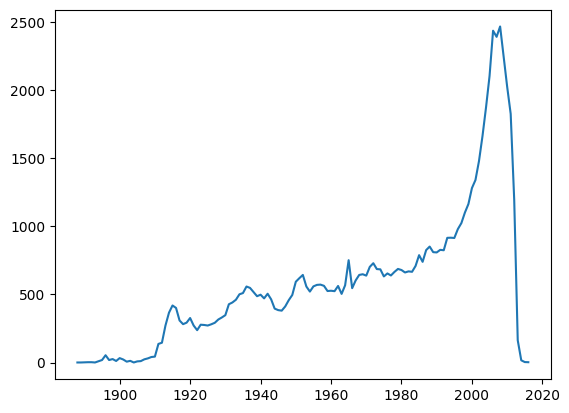

In [6]:
d = (df_movies
	.groupby('movie_release_year')
	.movie_release_year
	.agg(['count'])
	.rename(columns={'count': 'movie_count'})
)
display(d)

plt.plot(d.index, d.movie_count);

#### Countries

In [24]:
from collections import Counter
from itertools import chain

cnt = Counter(chain(*df_movies.movie_countries.values))
cnt.most_common(30)

[('United States of America', 34408),
 ('India', 8411),
 ('United Kingdom', 7868),
 ('France', 4395),
 ('Italy', 3163),
 ('Japan', 2647),
 ('Canada', 2534),
 ('Germany', 2393),
 ('Argentina', 1468),
 ('Hong Kong', 1240),
 ('Spain', 1136),
 ('Australia', 1114),
 ('South Korea', 887),
 ('Mexico', 870),
 ('Netherlands', 840),
 ('Sweden', 657),
 ('West Germany', 647),
 ('China', 645),
 ('Denmark', 610),
 ('Soviet Union', 564),
 ('Philippines', 389),
 ('Poland', 382),
 ('Czechoslovakia', 376),
 ('Belgium', 360),
 ('New Zealand', 355),
 ('Norway', 345),
 ('Russia', 345),
 ('Hungary', 325),
 ('German Democratic Republic', 322),
 ('Yugoslavia', 306)]

### Character dataset

In [8]:
df_chars = pd.read_csv(
	'../data/raw/MovieSummaries/character.metadata.tsv', sep='\t',
	names=['wiki_id', 'freebase_id', 'release', 'character_name', 'actor_birth', 'actor_gender', 'actor_height', 'actor_ethnicity_id', 'actor_name', 'actor_age', 'freebar_charact_id', 'freebase_char_id', 'freebase_actor_id']
)
assert df_chars.index.is_unique
df_chars

,wiki_id,freebase_id,release,character_name,actor_birth,actor_gender,actor_height,actor_ethnicity_id,actor_name,actor_age,freebar_charact_id,freebase_char_id,freebase_actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


In [9]:
# TODO : do some scraping to recover ethnicity from the Freebase web

### TV tropes (??)

In [10]:
df_tropes = pd.read_csv(
	'../data/raw/MovieSummaries/tvtropes.clusters.txt',
	sep='\t',
	names=['trope', 'char_movie_id']
)
df_tropes['char_name'] = df_tropes.char_movie_id.map(lambda x: json.loads(x)['char'])
df_tropes['movie_name'] = df_tropes.char_movie_id.map(lambda x: json.loads(x)['movie'])
df_tropes['actor_name'] = df_tropes.char_movie_id.map(lambda x: json.loads(x)['actor'])
df_tropes['freebase_id'] = df_tropes.char_movie_id.map(lambda x: json.loads(x)['id'])
df_tropes.drop(columns='char_movie_id', inplace=True)
df_tropes

,trope,char_name,movie_name,actor_name,freebase_id
0,absent_minded_professor,Professor Philip Brainard,Flubber,Robin Williams,/m/0jy9q0
1,absent_minded_professor,Professor Keenbean,Richie Rich,Michael McShane,/m/02vchl3
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,Ian McKellen,/m/0k6fkc
3,absent_minded_professor,Dr. Harold Medford,Them!,Edmund Gwenn,/m/0k6_br
4,absent_minded_professor,Daniel Jackson,Stargate,James Spader,/m/0k3rhh
...,...,...,...,...,...
496,young_gun,Morgan Earp,Tombstone,Bill Paxton,/m/0k776f
497,young_gun,Colorado Ryan,Rio Bravo,Ricky Nelson,/m/0k2kqg
498,young_gun,Tom Sawyer,The League of Extraordinary Gentlemen,Shane West,/m/0k5nsh
499,young_gun,William H. 'Billy the Kid' Bonney,Young Guns II,Emilio Estevez,/m/03lrjk0


### Character clusters

In [11]:
df_charclusters = pd.read_csv(
	'../data/raw/MovieSummaries/name.clusters.txt',
	sep='\t',
	names=['char_name', 'freebase_id']
)
df_charclusters

,char_name,freebase_id
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn
3,John Doe,/m/0jyg35
4,John Doe,/m/0k2_zn
...,...,...
2661,John Rolfe,/m/0k5_ql
2662,John Rolfe,/m/02vd6vs
2663,Elizabeth Swann,/m/0k1xvz
2664,Elizabeth Swann,/m/0k1x_d


In [12]:
# TODO : can we rebuild this from the other data ?

## CoreNLP messing around

In [13]:
!ls ../data/raw/corenlp_plot_summaries | head

10000053.xml
10000053.xml.gz
10002175.xml.gz
10002779.xml.gz
10003264.xml.gz
10004055.xml.gz
10004330.xml.gz
10004664.xml.gz
10006475.xml.gz
10007089.xml.gz
ls: write error: Broken pipe


In [14]:
!gzip -dkf ../data/raw/corenlp_plot_summaries/10000053.xml.gz

In [15]:
!head ../data/raw/corenlp_plot_summaries/10000053.xml

<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet href="CoreNLP-to-HTML.xsl" type="text/xsl"?>
<root>
  <document>
    <sentences>
      <sentence id="1">
        <tokens>
          <token id="1">
            <word>Fur</word>
            <lemma>Fur</lemma>


In [16]:
df_summary[df_summary.wiki_id == 10000053]

,wiki_id,summary
14485,10000053,Fur trapper Jean La Bête paddles his canoe th...


In [17]:
from bs4 import BeautifulSoup

with open('../data/raw/corenlp_plot_summaries/10000053.xml', 'r') as f:
    data = f.read()

data = BeautifulSoup(data, features='xml')
data.find_all('word')

[<word>Fur</word>,
 <word>trapper</word>,
 <word>Jean</word>,
 <word>La</word>,
 <word>B</word>,
 <word>te</word>,
 <word>paddles</word>,
 <word>his</word>,
 <word>canoe</word>,
 <word>through</word>,
 <word>wild</word>,
 <word>water</word>,
 <word>towards</word>,
 <word>the</word>,
 <word>settlement</word>,
 <word>in</word>,
 <word>order</word>,
 <word>to</word>,
 <word>sell</word>,
 <word>a</word>,
 <word>load</word>,
 <word>of</word>,
 <word>furs</word>,
 <word>.</word>,
 <word>At</word>,
 <word>the</word>,
 <word>settlement</word>,
 <word>a</word>,
 <word>steamboat</word>,
 <word>is</word>,
 <word>landing</word>,
 <word>and</word>,
 <word>the</word>,
 <word>trader</word>,
 <word>and</word>,
 <word>his</word>,
 <word>foster-child</word>,
 <word>Eve</word>,
 <word>,</word>,
 <word>arrive</word>,
 <word>at</word>,
 <word>the</word>,
 <word>seaport</word>,
 <word>to</word>,
 <word>fetch</word>,
 <word>mail</word>,
 <word>and</word>,
 <word>consumer</word>,
 <word>goods</word>,
 <word>.

Problem : the "ê" is split as two words..